## Gráficos de Barra e de Área Empilhados
Usaremos um dataset que exibe os dados sobre crimes na região de Washington DC. Veremos como agregar esses dados de modo a possibilitar gerar gráficos de barra e de área que ilustram a evolução de diferentes tipos de crime no decorrer dos anos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos começar criando o dataframe a partir de um arquivo csv.

In [2]:
df = pd.read_csv('washingtonDCCrime.csv')

In [4]:
df

,Year,Crime,Rate
0,2005,Murder,33.5
1,2006,Murder,29.1
2,2007,Murder,30.8
3,2008,Murder,31.4
4,2009,Murder,24.2
5,2010,Murder,21.8
6,2011,Murder,17.4
7,2012,Murder,13.9
8,2013,Murder,15.9
9,2014,Murder,15.9


Agora, usando a função crosstab do pacote pandas vamos agrupar os crimes por ano(Year) / tipo do crime (Crime). Note que Rate é a taxa de crimes por 100 mil habitantes.

In [5]:
summary = pd.crosstab(df['Year'], df['Crime'], values=df['Rate'], aggfunc=np.sum)
summary

/var/folders/q7/zt49h4xj2xv3yw2hpzgwq8w40000gn/T/ipykernel_7794/4011763369.py:1: FutureWarning: The provided callable <function sum at 0x108583d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = pd.crosstab(df['Year'], df['Crime'], values=df['Rate'], aggfunc=np.sum)


Crime,Aggravated Assault,Murder,Rape,Robery
Year,,,,
2005,682.2,33.5,28.5,635.7
2006,789.1,29.1,31.8,658.4
2007,626.7,30.8,32.6,725.0
2008,626.4,31.4,31.4,748.5
2009,565.3,24.2,25.0,734.4
2010,559.1,21.8,30.9,715.0
2011,494.0,17.4,27.9,661.4
2012,553.3,13.9,37.3,637.3
2013,590.8,15.9,45.8,628.9


Vamos agora plotar um gráfico de barras a partir do sumário gerado.

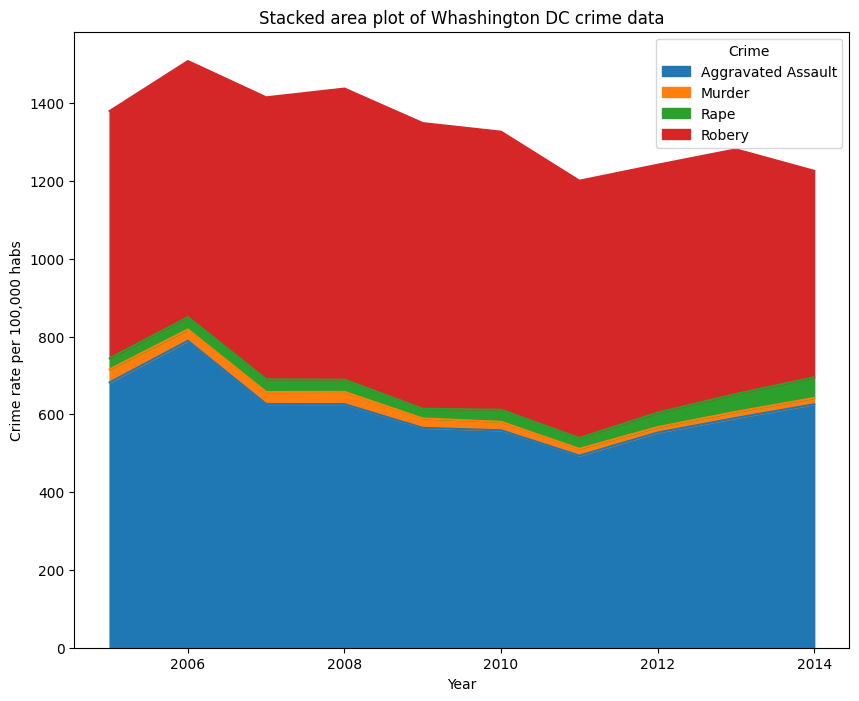

In [6]:
plt.rcParams['figure.figsize'] = [10,8]
summary.plot(kind='area', stacked=True)
plt.title('Stacked area plot of Whashington DC crime data')
plt.ylabel('Crime rate per 100,000 habs')
plt.xlabel('Year')
plt.show()

É possível melhorar o aspecto do gráfico customizando o tamanho da fonte, a posição das legendas, etc. Para tanto é necessário usar set_context do pacote seaborn.

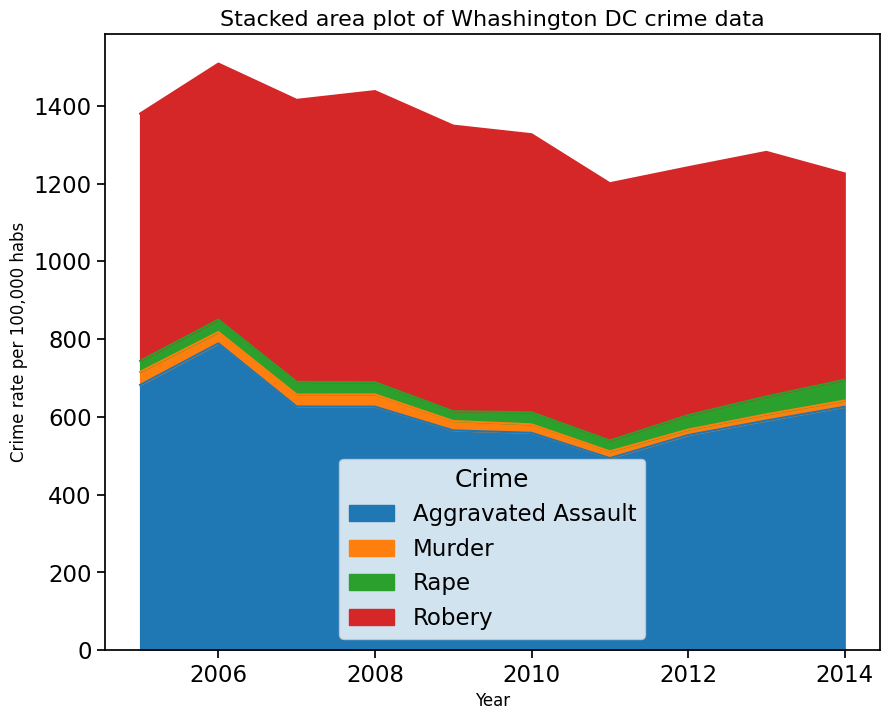

In [9]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set_context('notebook', font_scale=1.5, rc={'font.size': 14, 'axes.titlesize': 16, 'axes.labelsize': 12})
summary.plot(kind='area', stacked=True)
plt.title('Stacked area plot of Whashington DC crime data')
plt.ylabel('Crime rate per 100,000 habs')
plt.xlabel('Year')
plt.show()

Por fim, para gerar um gráfico de barras, basta trocar 'area' por 'bar'.

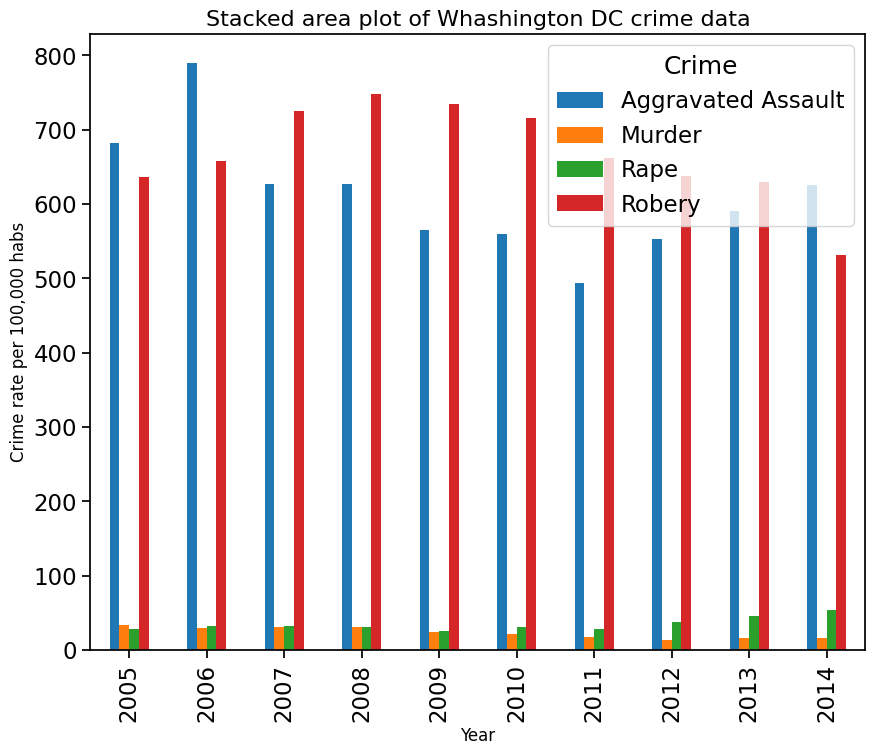

In [11]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set_context('notebook', font_scale=1.5, rc={'font.size': 14, 'axes.titlesize': 16, 'axes.labelsize': 12})
summary.plot(kind='bar', stacked=False)
plt.title('Stacked area plot of Whashington DC crime data')
plt.ylabel('Crime rate per 100,000 habs')
plt.xlabel('Year')
plt.show()